In [1]:
import torch
import torchvision

from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.utils.visualizer import Visualizer
from detectron2.config import get_cfg
from detectron2.data import build_detection_test_loader
from detectron2.data import detection_utils as utils
from detectron2.engine import DefaultPredictor
from detectron2.data import DatasetMapper

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [21]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [ ]:
cfg = get_cfg()
cfg.merge_from_file('/workspace/research/detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x.yaml')

cfg.DATASETS.TRAIN = cfg.DATASETS.TEST
cfg.SOLVER.IMS_PER_BATCH = 1
cfg.MODEL.WEIGHTS = '/workspace/research/detectron2/weights/model_final_04e291.pkl'

predictor = DefaultPredictor(cfg)

metadata = MetadataCatalog.get(cfg.DATASETS.TEST[0])
dataloader = build_detection_test_loader(cfg, 'keypoints_coco_2017_val')

In [ ]:
for i, data in enumerate(dataloader):
    dat = dataloader.dataset.__getitem__(240)
    
    for d in [data2]:
        im = d["image"].permute(1, 2, 0).cpu().detach().numpy()
        r = predictor(im)
        
        instances = r['instances']
        # print(instances)
        r = instances.get('pred_keypoint_heatmaps')
        break
        for j in range(len(r[0, 0])):
            x = r[0, j]
            x = torch.nn.Sigmoid()(x)
            x = x.cpu().detach().numpy()
            x[x < 0.999] = 0
            print(x.shape)
        
            im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
            plt.imshow(x);
            plt.show()
    break

In [12]:
for i, batch in enumerate(dataloader):
    for per_image in batch:
        img = per_image["image"].permute(1, 2, 0).cpu().detach().numpy()
        img = utils.convert_image_to_rgb(img, cfg.INPUT.FORMAT)

        visualizer = Visualizer(img, metadata=metadata, scale=1)
        target_fields = per_image["instances"].get_fields()
        labels = [metadata.thing_classes[i] for i in target_fields["gt_classes"]]
        vis = visualizer.overlay_instances(
            labels=labels,
            boxes=target_fields.get("gt_boxes", Nonfor per_image in batch:
        img = per_image["image"].permute(1, 2, 0).cpu().detach().numpy()
        img = utils.convert_image_to_rgb(img, cfg.INPUT.FORMAT)

        visualizer = Visualizer(img, metadata=metadata, scale=1)
        target_fields = per_imae),
            masks=target_fields.get("gt_masks", None),
            keypoints=target_fields.get("gt_keypoints", None),
        )
        break
    # if i == 1:
    break
        
# im = vis.get_image()
# plt.imshow(im); plt.show(        im = vis.get_image()
        plt.imshow(im); plt.show()

SyntaxError: invalid syntax (<ipython-input-12-2d5762ef740c>, line 11)

In [14]:
def visualize(im, hand_pts):
    for pt in hand_pts:
        cv.circle(im, tuple(pt), 3, (0, 0, 255), -1)
    plt.imshow(im)
    plt.show()

In [28]:
def read_and_load(filename: str, is_right: bool = True):

    filename += ('_r' if is_right else '_l')
    im = cv.imread(filename + '.jpg')
    
    try:
        with open(filename + '.json', 'r') as f:
            data = json.load(f)
            hand_pts = np.array(data['hand_pts'], dtype=np.intp)[:, :2]
    except FileNotFoundError:
        hand_pts = None
        
    return im, hand_pts

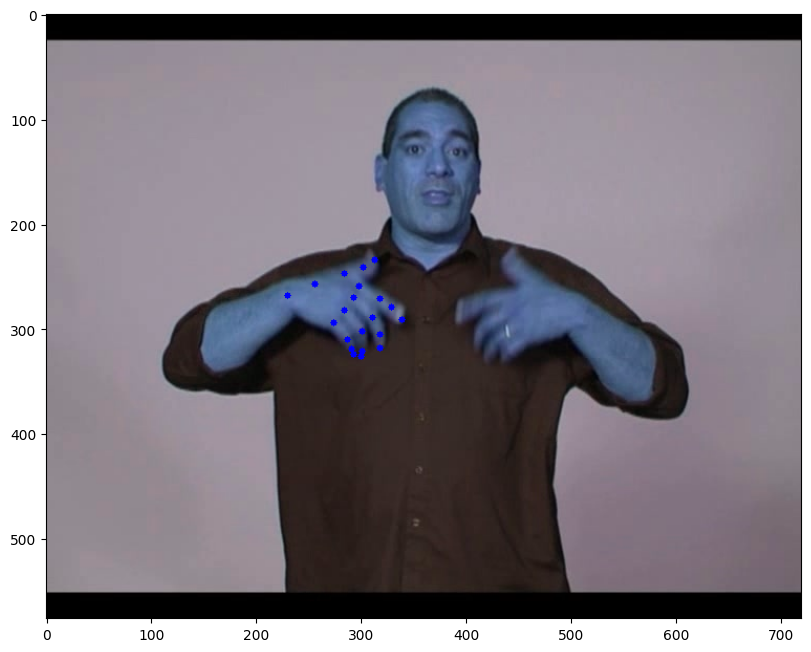

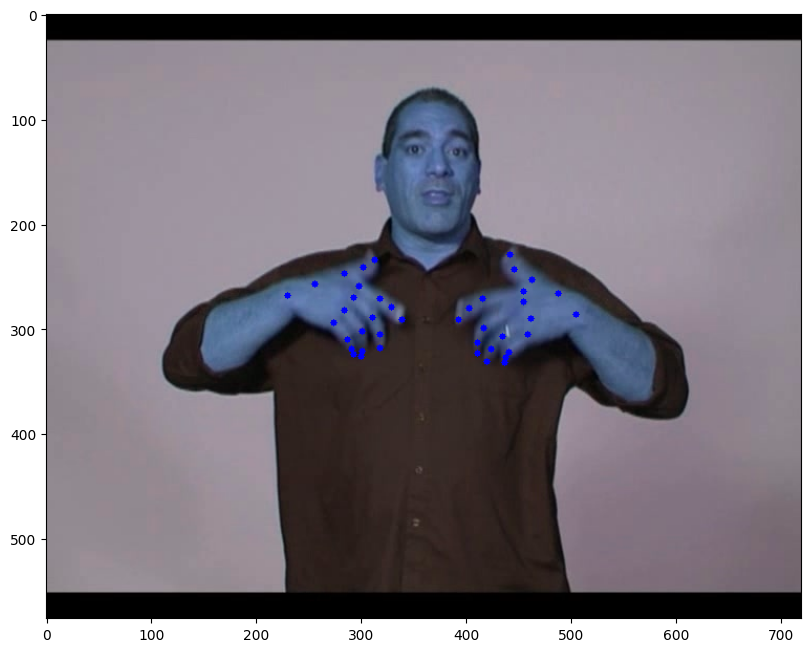

In [32]:
import os
import json

root = '/workspace/research/datasets/hand_labels/manual_train/'
fn = 'Ricki_unit_8.flv_000005'

filename = os.path.join(root, fn)
im, hand_pts = read_and_load(filename)

visualize(im, hand_pts)

_, hand_pts = read_and_load(filename, False)
visualize(im, hand_pts)